In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('car data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.drop('Car_Name',axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [6]:
data.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
data['Year']=2022-data['Year']

In [8]:
data['Year'].head(5)

0     8
1     9
2     5
3    11
4     8
Name: Year, dtype: int64

In [9]:
data = pd.get_dummies(data,drop_first = True)

In [10]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,8,3.35,5.59,27000,0,0,1,0,1
1,9,4.75,9.54,43000,0,1,0,0,1
2,5,7.25,9.85,6900,0,0,1,0,1
3,11,2.85,4.15,5200,0,0,1,0,1
4,8,4.60,6.87,42450,0,1,0,0,1


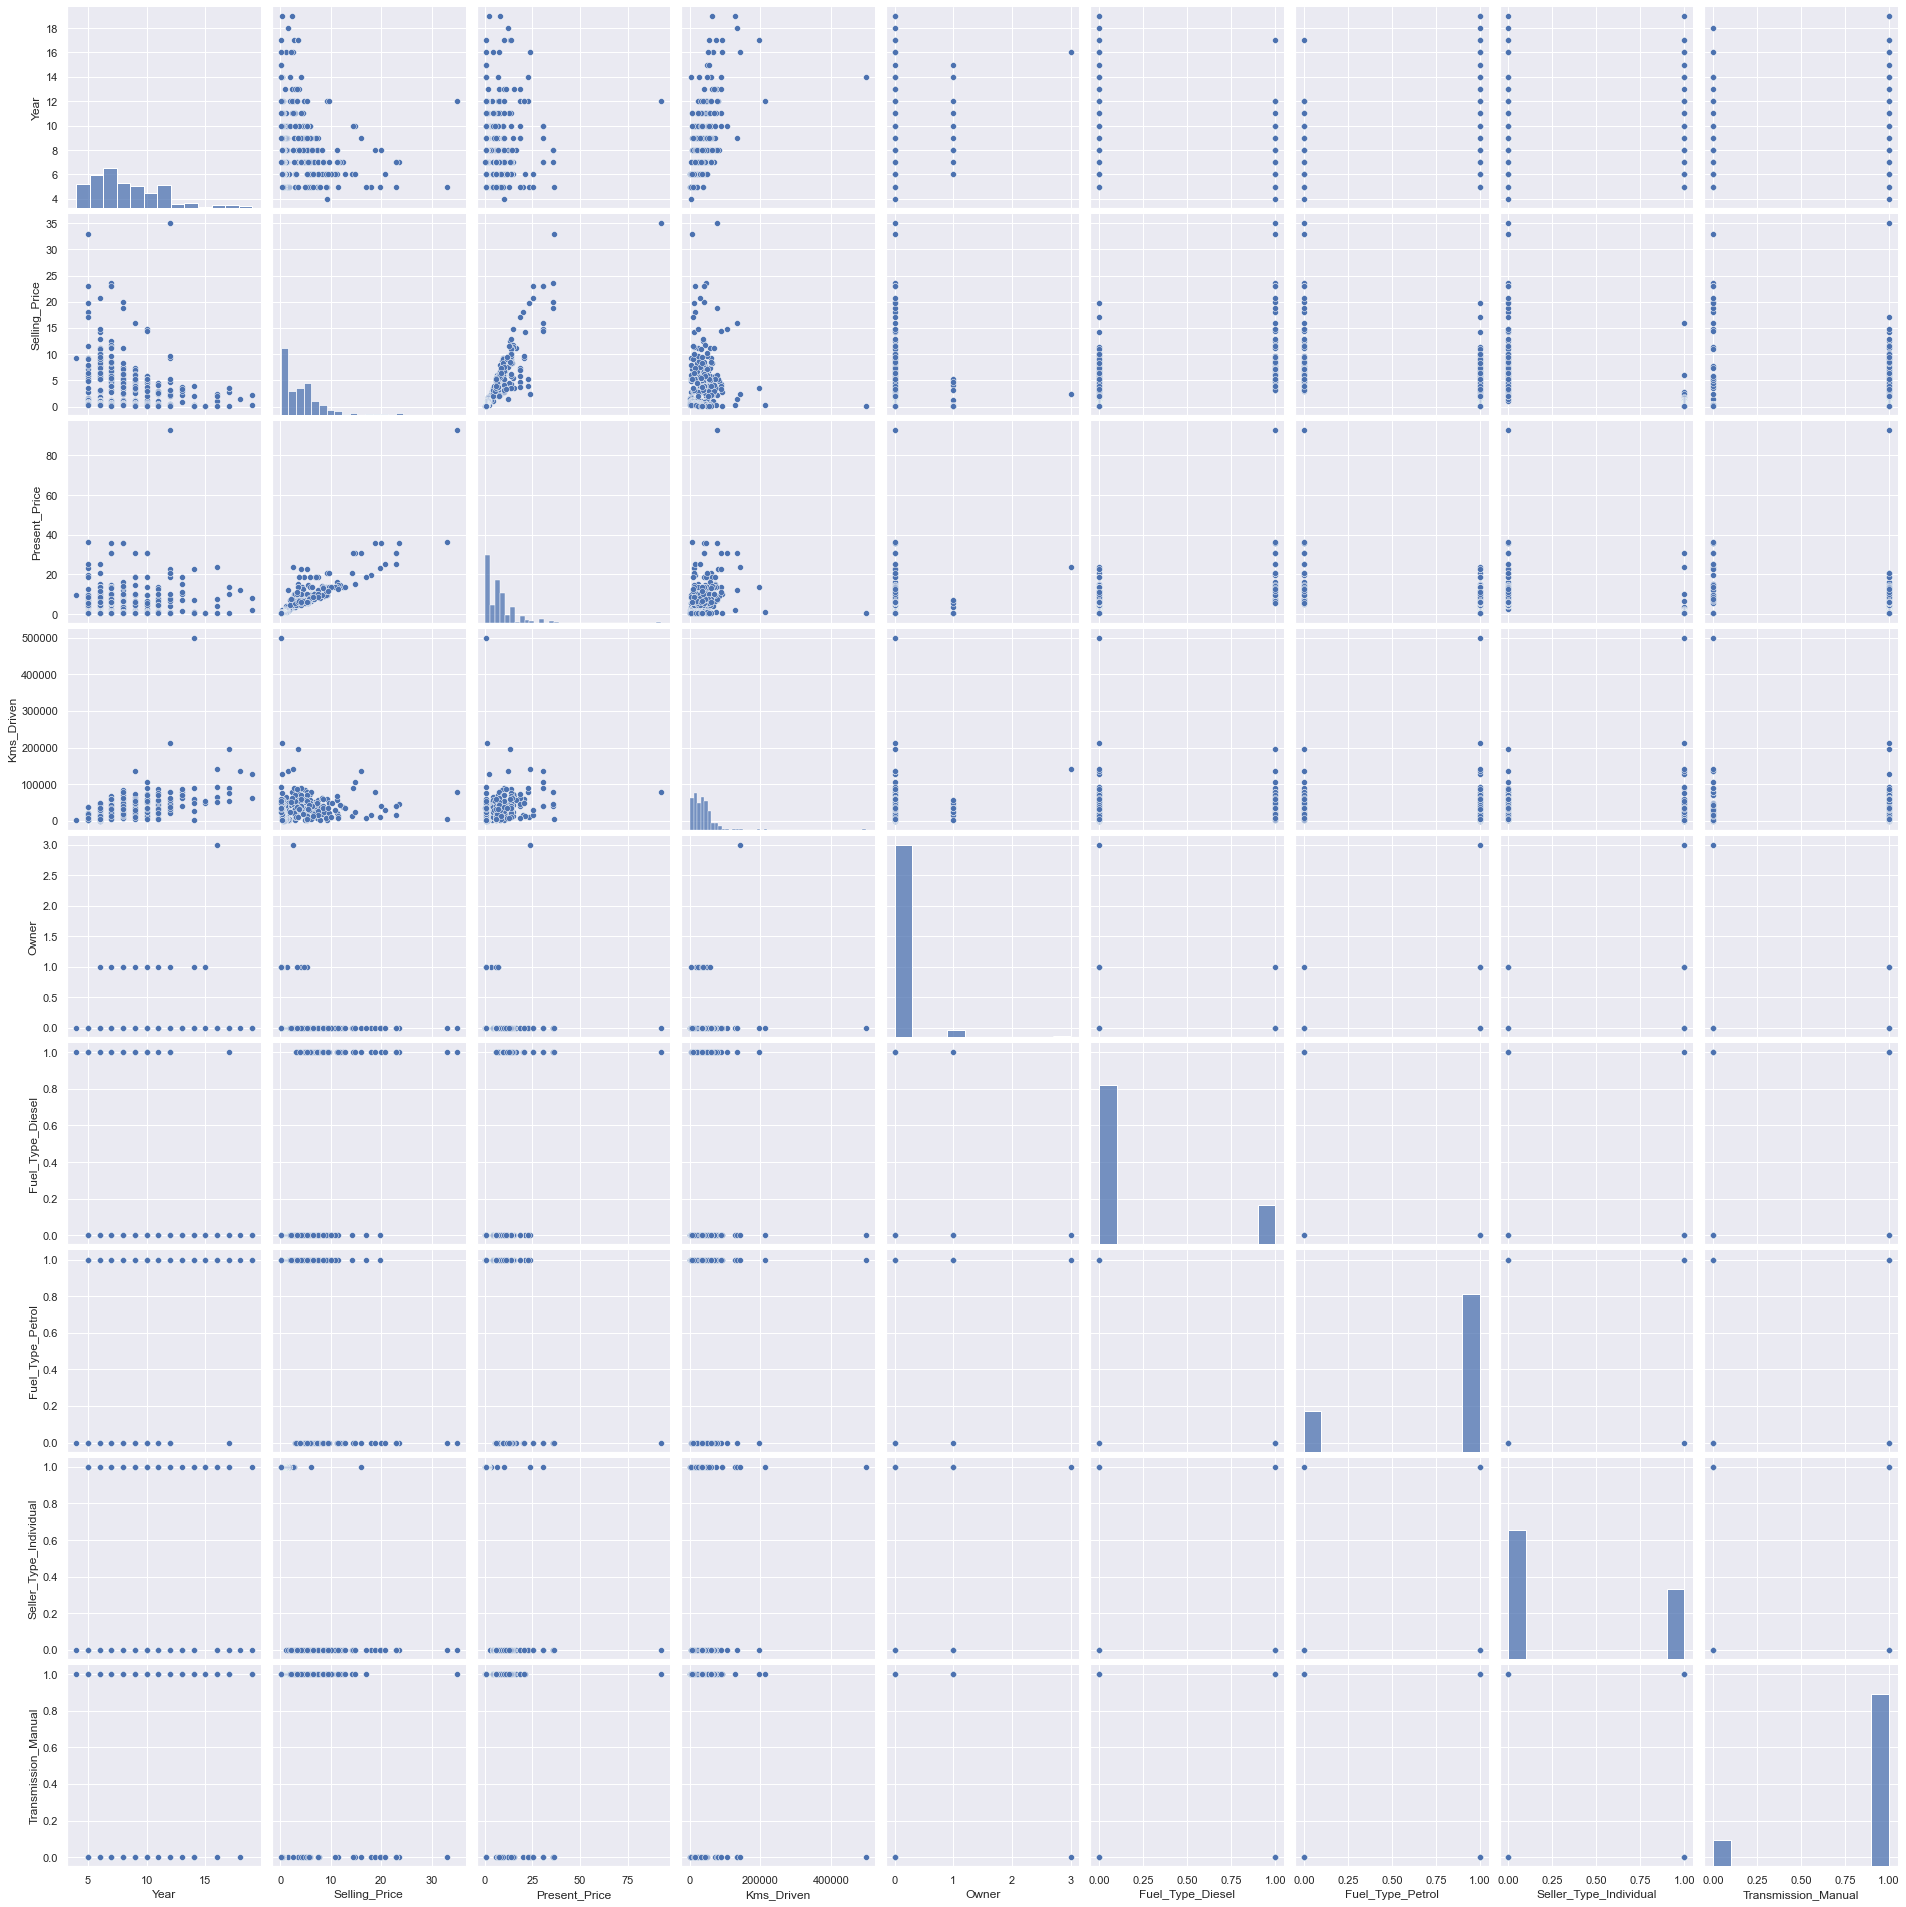

In [11]:
sns.set()
sns.pairplot(data,height=3)

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

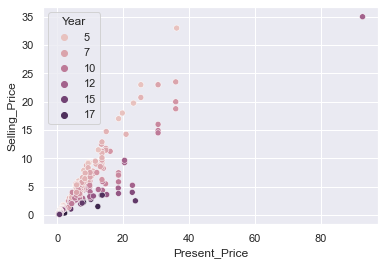

In [12]:
sns.scatterplot(data=data, x='Present_Price', y='Selling_Price',hue='Year')

In [13]:
data=data[data['Present_Price']<50]

<AxesSubplot:xlabel='Kms_Driven', ylabel='Year'>

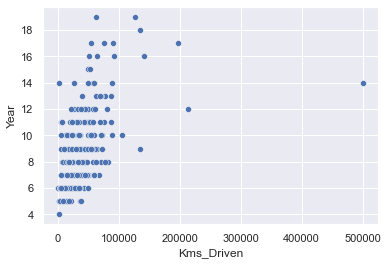

In [14]:
sns.scatterplot(data=data, x='Kms_Driven', y='Year')

In [15]:
data=data[data['Kms_Driven']<30000]

In [16]:
corr=data.corr()

In [17]:
corr

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Year,1.000000,-0.343174,-0.302663,0.270975,0.245084,-0.201068,0.201068,0.243230,0.037910
Selling_Price,-0.343174,1.000000,0.986746,0.071873,-0.099946,0.595882,-0.595882,-0.680595,-0.342454
Present_Price,-0.302663,0.986746,1.000000,0.120272,-0.095242,0.533746,-0.533746,-0.714366,-0.331593
Kms_Driven,0.270975,0.071873,0.120272,1.000000,0.108362,0.054399,-0.054399,-0.184735,0.060855
Owner,0.245084,-0.099946,-0.095242,0.108362,1.000000,-0.052976,0.052976,0.105656,0.073350
Fuel_Type_Diesel,-0.201068,0.595882,0.533746,0.054399,-0.052976,1.000000,-1.000000,-0.290364,-0.225479
Fuel_Type_Petrol,0.201068,-0.595882,-0.533746,-0.054399,0.052976,-1.000000,1.000000,0.290364,0.225479
Seller_Type_Individual,0.243230,-0.680595,-0.714366,-0.184735,0.105656,-0.290364,0.290364,1.000000,0.061573
Transmission_Manual,0.037910,-0.342454,-0.331593,0.060855,0.073350,-0.225479,0.225479,0.061573,1.000000


<AxesSubplot:>

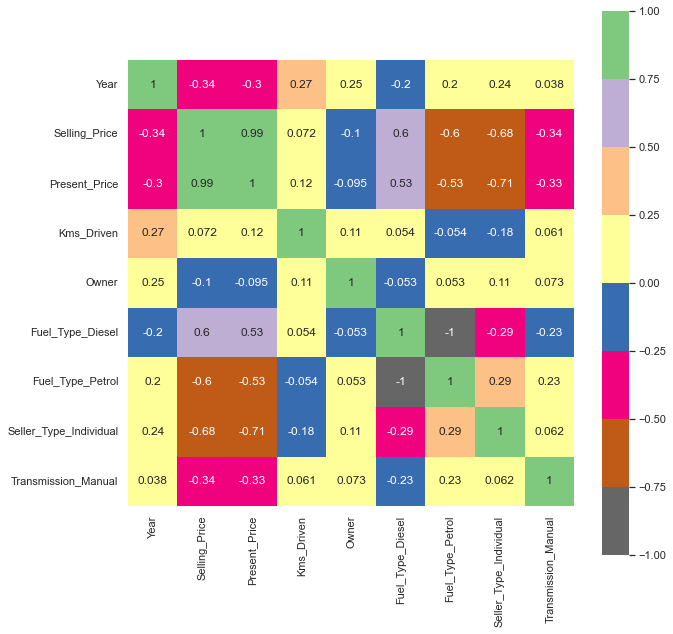

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,annot=True,cmap=plt.cm.Accent_r)

In [19]:
##Dependent And Independent Features:
X=data.drop('Selling_Price',axis=1)
y=data['Selling_Price']

In [20]:
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,8,5.59,27000,0,0,1,0,1
2,5,9.85,6900,0,0,1,0,1
3,11,4.15,5200,0,0,1,0,1
5,4,9.83,2071,0,1,0,0,1
6,7,8.12,18796,0,0,1,0,1


In [21]:
y.head()

0    3.35
2    7.25
3    2.85
5    9.25
6    6.75
Name: Selling_Price, dtype: float64

In [22]:
#Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
print(X_train.shape,X_test.shape)

(94, 8) (47, 8)


In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
RF=RandomForestRegressor()

In [29]:
model1=RF.fit(X_train,y_train)

In [31]:
y_pred=RF.predict(X_test)
print(y_pred)

[ 0.4718  2.369   2.1067  0.6786  0.3072  4.847   0.4336  2.903   6.6105
  4.498   1.2785  0.8105 18.2043  4.849  13.973   8.7367  1.2785  9.3622
  2.426   5.1525  0.6032  0.2938  9.0412  4.588   0.614   6.5385  0.6463
  1.1546  0.3252  8.6618  5.9505 20.3238  5.1335  1.1785  0.6678  0.5375
  5.005   0.4436  9.5627  0.609   4.5395  0.5459  1.281   1.1804 14.8559
  1.25    5.6725]


In [32]:
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test,y_pred)

In [33]:
print("mean absolute error:",mae)

mean absolute error: 0.7647297872340423


In [35]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
model2=LR.fit(X_train,y_train)
y_pred=model2.predict(X_test)
print(y_pred)

[ 0.20955602  2.76949506  2.87613928  0.87158199  0.10734547  4.50078246
  0.6341297   3.33940759  6.36744152  5.01547459  1.63393446  1.03971432
 17.48936281  4.30779545 10.98375814 11.82894854  1.69415191 10.2098626
  3.09059016  4.56433063  0.65792872 -0.29979208  9.99731518  4.02549977
  0.41920235  5.90449925  0.63706619  1.24915659 -0.24984224  7.13380762
  5.51534843 29.63752381  4.52166081  1.255139    0.81737361  0.45456324
  4.26068489  0.29695131 10.0736519   0.48020638  3.80159186  0.61510986
  1.53189401  1.37807979 14.1215504   1.6208002   4.82916077]


In [36]:
mae=metrics.mean_absolute_error(y_test,y_pred)
print("mean absolute error:",mae)

mean absolute error: 0.585179640639683


Here Linear Regression is giving more accuracy then Random Forest

In [38]:
import pickle
file = open('model2.pkl','wb')
pickle.dump(LR,file)